In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# 1. Load the dataset
df = pd.read_csv("../data/BostonHousing.csv")

In [3]:
# 2. Drop any rows with missing values
df.dropna(inplace=True)

In [6]:
# 3. Separate features (X) and target variable (y)
X = df.drop(columns=['medv'])  # Features (input)
y = df['medv']                 # Target (house price)

In [ ]:
# 4. Create new features manually


# Feature 1: Square of % lower status population — captures non-linear effects
X['lstat_squared'] = X['lstat'] ** 2

# Feature 2: Square of average number of rooms — captures non-linear effects
X['rm_squared'] = X['rm'] ** 2

# Feature 3: Tax-to-room ratio — gives a sense of tax burden per room
X['tax_per_rm'] = X['tax'] / X['rm']

# These features may help the model by revealing relationships not captured in the original data


In [ ]:
# 5. Scale the features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# 6. Split the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [ ]:
# 7. Train a linear regression model

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# 8. Make predictions on the test set

y_pred = model.predict(X_test)


In [ ]:
# 9. Evaluate the model

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", round(mse, 2))
print("R² Score:", round(r2, 2))

Mean Squared Error: 15.01
R² Score: 0.8


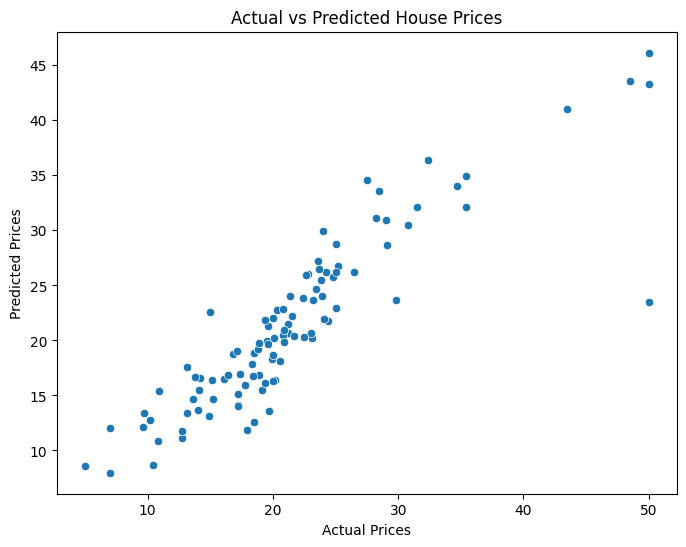

In [ ]:
# 10. Visualize actual vs predicted prices

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

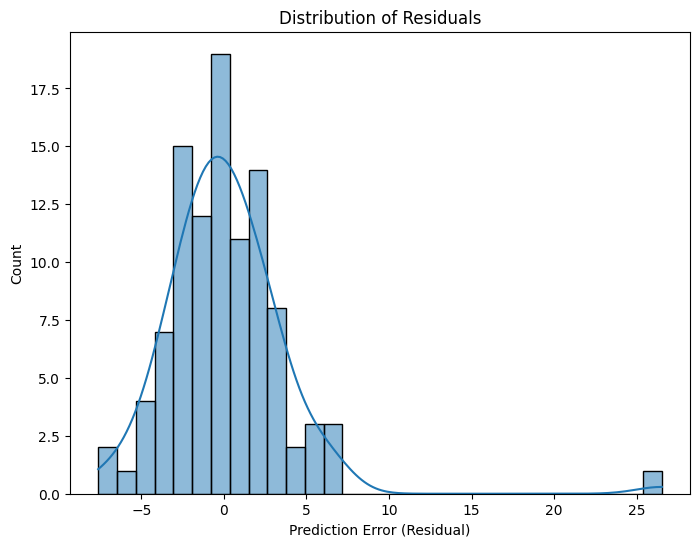

In [ ]:
# 11. Visualize residuals (prediction errors)

residuals = y_test - y_pred

plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Prediction Error (Residual)")
plt.title("Distribution of Residuals")
plt.show()